# Week 2 Homework - Linear Regression - Mai Anh Ly

In [29]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Change plotting settings 

%matplotlib inline
sns.set()

## House Prices in Boston

The dataset contains housing prices of 506 residential lots in the city of Boston, collected by the U.S. Census Service in 1978.  

In [2]:
# Import boston data from file to a pandas DataFrame
boston = pd.read_csv("boston.txt", 
                     delimiter="\t",
                     names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
                    index_col=None)

In [3]:
# Preview first 5 rows

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# View datatypes and dataframe info

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


### Features of dataset

| Feature | Description |
| :---: |:--- |
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS | proportion of non-retail business acres per town |
| CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centres |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per \$10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT | % lower status of the population |


Possibly co-linear features to watch out for: 
- INDUS and ZN (relationship between proportion of non-retail land and residential land)
- INDUS and NOX (towns with high proportion of non-retail areas i.e. industrial areas would probably have higher levels of pollution from nitric oxide)
- INDUS and DIS (Employment centers probably not very far from towns with high proportion of industrial areas)
- INDUS and TAX (Industrial areas are taxed higher than residential areas)

### Output of dataset

- MEDV: Median value of owner-occupied homes in \$1000's 

In [5]:
# Summarise data

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


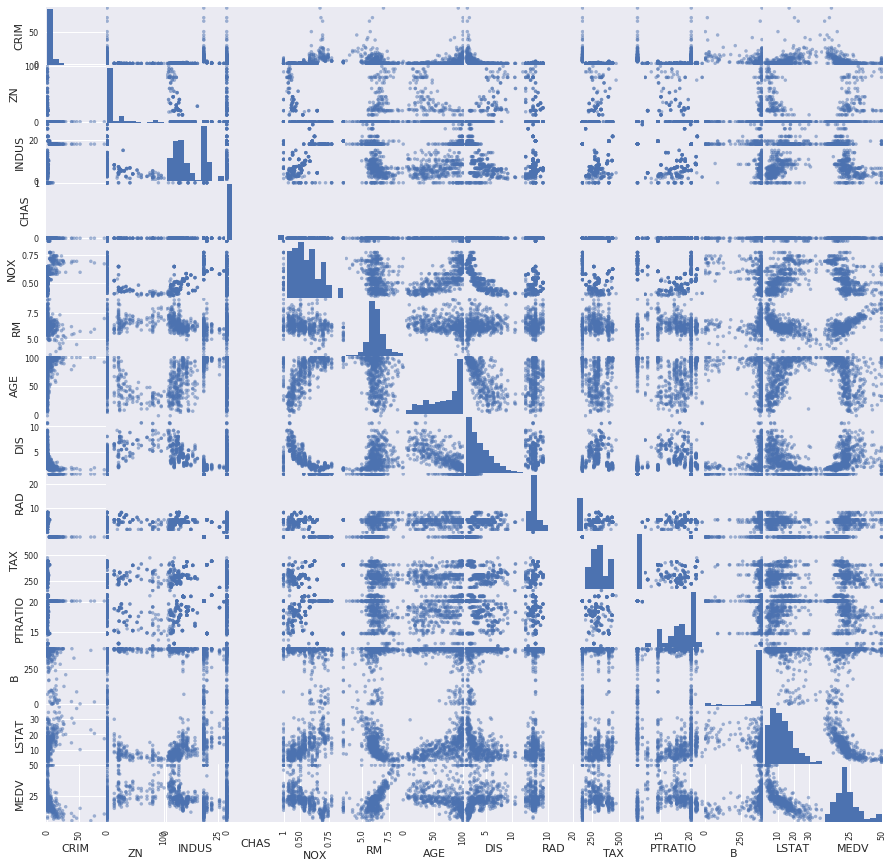

In [22]:
# Plot scatter matrix

pd.plotting.scatter_matrix(boston, figsize=(15,15))
plt.show()

On viewing the MEDV column of the scatterplot matrix, there seems to be a few MEDV datapoints that equal 50. This looks most obvious in a histogram of MEDV, as well as in scatterplots LSTAT vs. MEDV, RM vs. MEDV and NOX vs. MEDV.  

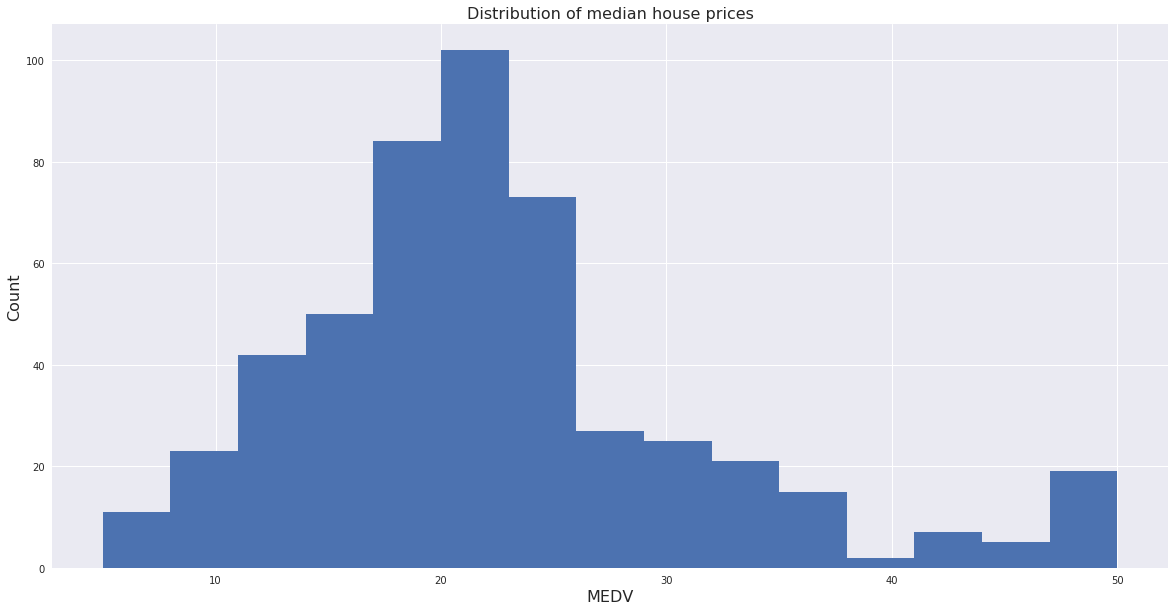

In [17]:
# Plot distribution of MEDV

boston['MEDV'].hist(bins=15, figsize=(20, 10))
plt.xlabel('MEDV', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of median house prices', fontsize=16)
plt.show()

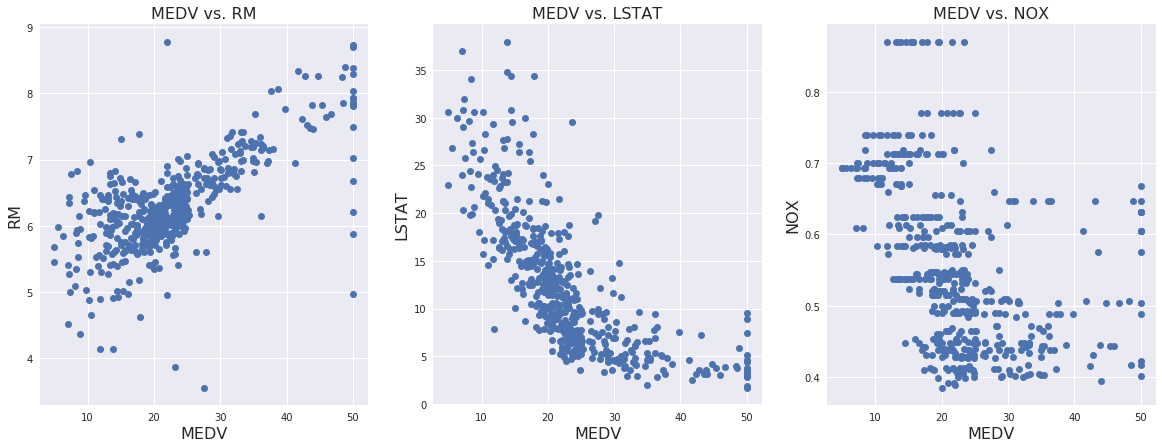

In [27]:
# Adjust figure size

plt.figure(figsize=(20, 7))

# Plot RM, LSTAT and NOX separately against MEDV

for i, col in enumerate(['RM', 'LSTAT', 'NOX']):
    plt.subplot(1, 3, i+1)
    plt.plot(boston['MEDV'], boston[col], 'o')
    plt.title('MEDV vs. ' + col, fontsize=16)
    plt.xlabel('MEDV', fontsize=16)
    plt.ylabel(col, fontsize=16)
    
plt.show()

The spike of \$50,000 median house prices seems suspicious, so it may be safer to remove them from further analysis.  

In [19]:
# Filter out MEDV = 50

boston_new = boston.loc[boston['MEDV'] < 50]

In [21]:
# Check datatypes and number of values in new dataframe

boston_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
CRIM       490 non-null float64
ZN         490 non-null float64
INDUS      490 non-null float64
CHAS       490 non-null int64
NOX        490 non-null float64
RM         490 non-null float64
AGE        490 non-null float64
DIS        490 non-null float64
RAD        490 non-null int64
TAX        490 non-null float64
PTRATIO    490 non-null float64
B          490 non-null float64
LSTAT      490 non-null float64
MEDV       490 non-null float64
dtypes: float64(12), int64(2)
memory usage: 57.4 KB


16 MEDV = 50 datapoints were removed from the dataset, leaving us with 490 observations.

In [24]:
# Check for NaN values

boston_new.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Questions

1. Is there a relationship between the features of the dataset and median house prices (MEDV)?
2. Which features contribute the most to an increase in MEDV?
3. Can MEDV be predicted with the features from this dataset?

In [23]:
# Create correlation matrix from new df

boston_new.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


- From the correlation matrix, there seems to be a positive linear relationship between MEDV and average number of rooms (RM), and student-teacher ratio (PTRATIO), where Pearson p > 0.5. 
- There also seems to be a slight negative relationship between MEDV,  % lower status (LSTAT), proportion of industrial acres in town (INDUS), nitric oxide concentration (NOX) and property tax rate (TAX), where Pearson p < -0.6. 

However:
- According to the correlation matrix, Pearson p for INDUS and NOX and INDUS and TAX are > 0.7, which means there is indeed a linear correlation, as discussed earlier. 
- INDUS and LSTAT also have a relationship (Pearson p > 0.6)

Therefore, LSTAT was selected as a feature for the linear regression model, as it had a strong negative correlation to MEDV (Pearson p = -0.76).

### Linear regression model

In [38]:
# create a fitted model in one line
lm = smf.ols(formula='MEDV ~ LSTAT', data=boston_new).fit()

# print the coefficients
lm.params

Intercept    32.540410
LSTAT        -0.843738
dtype: float64

In [40]:
lm.pvalues

Intercept    6.927128e-250
LSTAT         2.598473e-93
dtype: float64

The co-efficient for LSTAT is -0.84, which means for every increasing unit of LSTAT, there is a decrease of -0.84 in MEDV. The p-value for this is far below 0.05, which means that this relationship is very likely to be real. 

In [39]:
# Print a summary of the model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     666.6
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           2.60e-93
Time:                        11:16:45   Log-Likelihood:                -1494.4
No. Observations:                 490   AIC:                             2993.
Df Residuals:                     488   BIC:                             3001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.5404      0.481     67.581      0.000      31.594      33.486
LSTAT         -0.8437      0.033    -25.819      0.000      -0.908      -0.780
==============================================================================
Omnibus:                      106.018   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.145
Skew:                           1.218   Prob(JB):                     5.71e-44
Kurtosis:                       4.953   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has an R-squared of 0.58, which means the datapoints are not closely fitted to the line represented by the model. This can be visualised by fitting a line of MEDV predictions on a scatterplot of LSTAT vs. MEDV. 

### Plotting line of least squares

In [42]:
# Predict new values of MEDV using the above model

lstat_range = pd.DataFrame({'LSTAT': [boston_new['LSTAT'].min(), boston_new['LSTAT'].max()]})
preds = lm.predict(lstat_range)
preds

0    30.869808
1     0.503664
dtype: float64

In [61]:
# Checking the prediction manually

print(32.5404-0.8437*1.98)
print(32.5404-0.8437*37.97)

30.869874
0.5051109999999994


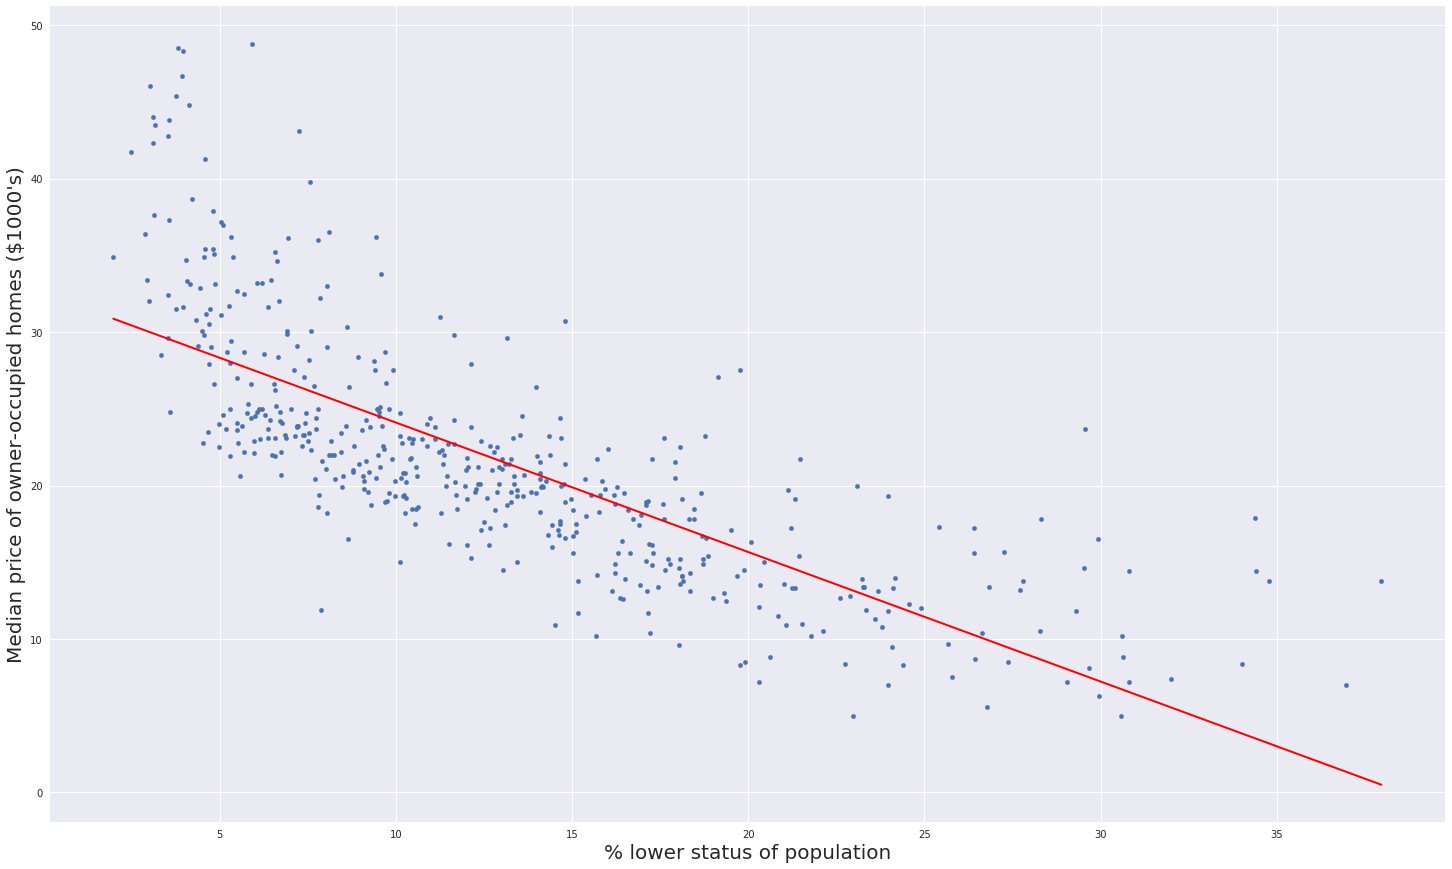

In [46]:
# Plot linear regression model

boston_new.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(25, 15))
plt.plot(lstat_range, preds, c='red', linewidth=2)
plt.xlabel('% lower status of population', fontsize=20)
plt.ylabel('Median price of owner-occupied homes ($1000\'s)', fontsize=20)
plt.show()

### Multiple Linear Regression

In [52]:
# Create a linear regression model incorporating more features

multi_lm = smf.ols(formula='MEDV ~ LSTAT + RM + PTRATIO', data=boston_new).fit()

# Print new model parameters

multi_lm.params

Intercept    21.558906
LSTAT        -0.522233
RM            3.911102
PTRATIO      -0.950341
dtype: float64

In [53]:
# Print summary of the new model

multi_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     401.7
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          3.79e-131
Time:                        11:39:43   Log-Likelihood:                -1399.9
No. Observations:                 490   AIC:                             2808.
Df Residuals:                     486   BIC:                             2825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5589      3.247      6.639      0.000      15.179      27.939
LSTAT         -0.5222      0.035    -14.886      0.000      -0.591      -0.453
RM             3.9111      0.372     10.525      0.000       3.181       4.641
PTRATIO       -0.9503      0.098     -9.741      0.000      -1.142      -0.759
==============================================================================
Omnibus:                       53.446   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.064
Skew:                           0.726   Prob(JB):                     9.18e-19
Kurtosis:                       4.401   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of this model is 0.711, which is an improvement on a model that only incorporated LSTAT. 